# 그래프 분석
## 1. Bar Chart

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
# 음수 표시

from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [4]:
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [7]:
# 데이터 불러오기
df_fitness = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/FITNESS.csv",
                    encoding = "euc-kr")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

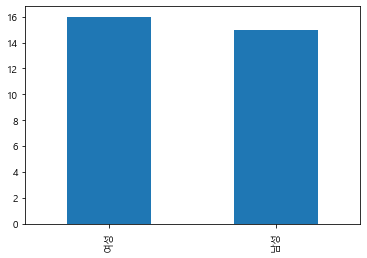

In [10]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

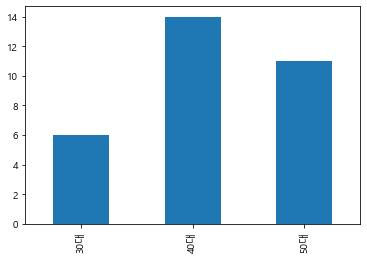

In [9]:
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace = True)
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

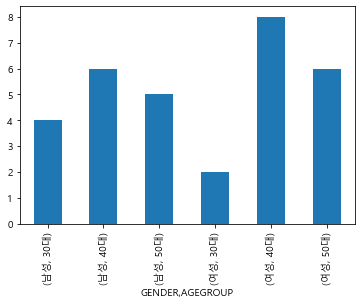

In [11]:
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_groupby_total.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

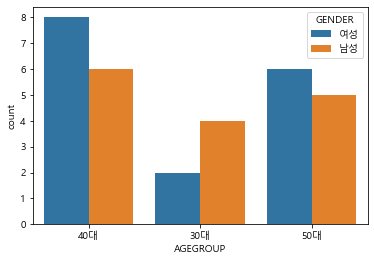

In [12]:
sns.countplot(x = 'AGEGROUP', hue = 'GENDER', data = df_fitness)

# 2. Histogram

<AxesSubplot:>

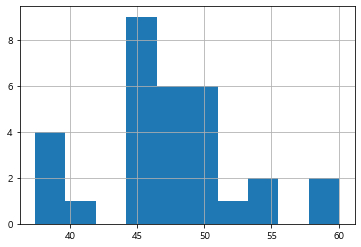

In [13]:
# OXY
df_fitness["OXY"].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

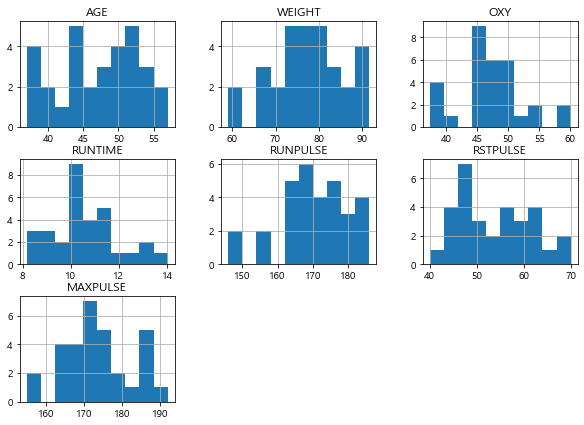

In [15]:
# 숫자형 변수
df_fitness.hist(figsize=(10, 7))

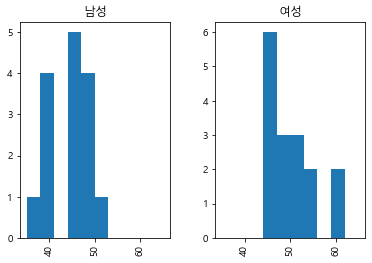

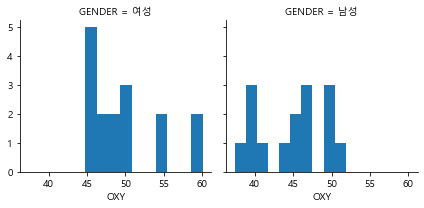

In [16]:
# 성별 혈당 산소 요구량
df_fitness.hist(column = "OXY", by="GENDER", range=(35,65))
grid = sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist, "OXY")

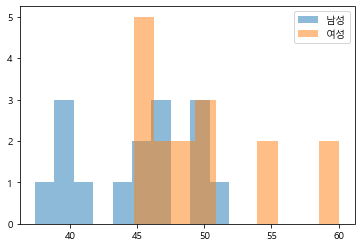

In [17]:
# 성별 혈당 산소 요구량 중첩
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label = "여성", alpha = 0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

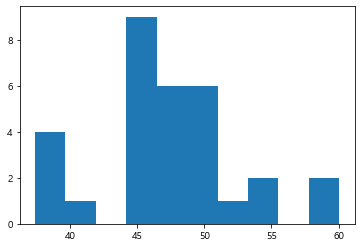

In [18]:
# bin 수 변경
plt.hist(x = "OXY", data = df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

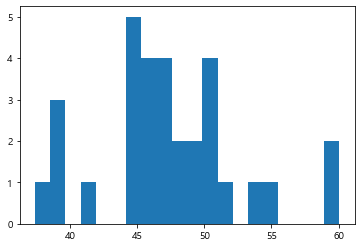

In [19]:
# bin 조정
plt.hist(x = "OXY", data = df_fitness, bins = 20)

# 3. Box Plot

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

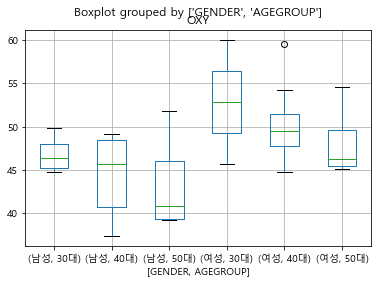

In [20]:
df_fitness.boxplot(column="OXY", by=["GENDER", "AGEGROUP"])

# 4. Pie Chart

<AxesSubplot:ylabel='None'>

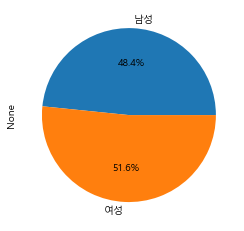

In [21]:
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y = "OXY", autopct = "%.1f%%")

<AxesSubplot:ylabel='None'>

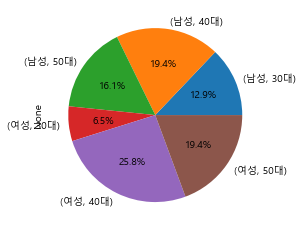

In [23]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

# 5. Scatter Plot

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

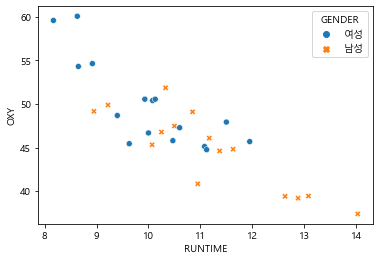

In [24]:
sns.scatterplot(x = "RUNTIME", y="OXY", hue="GENDER", style = "GENDER", data = df_fitness)

# 6. Scatter Matrix

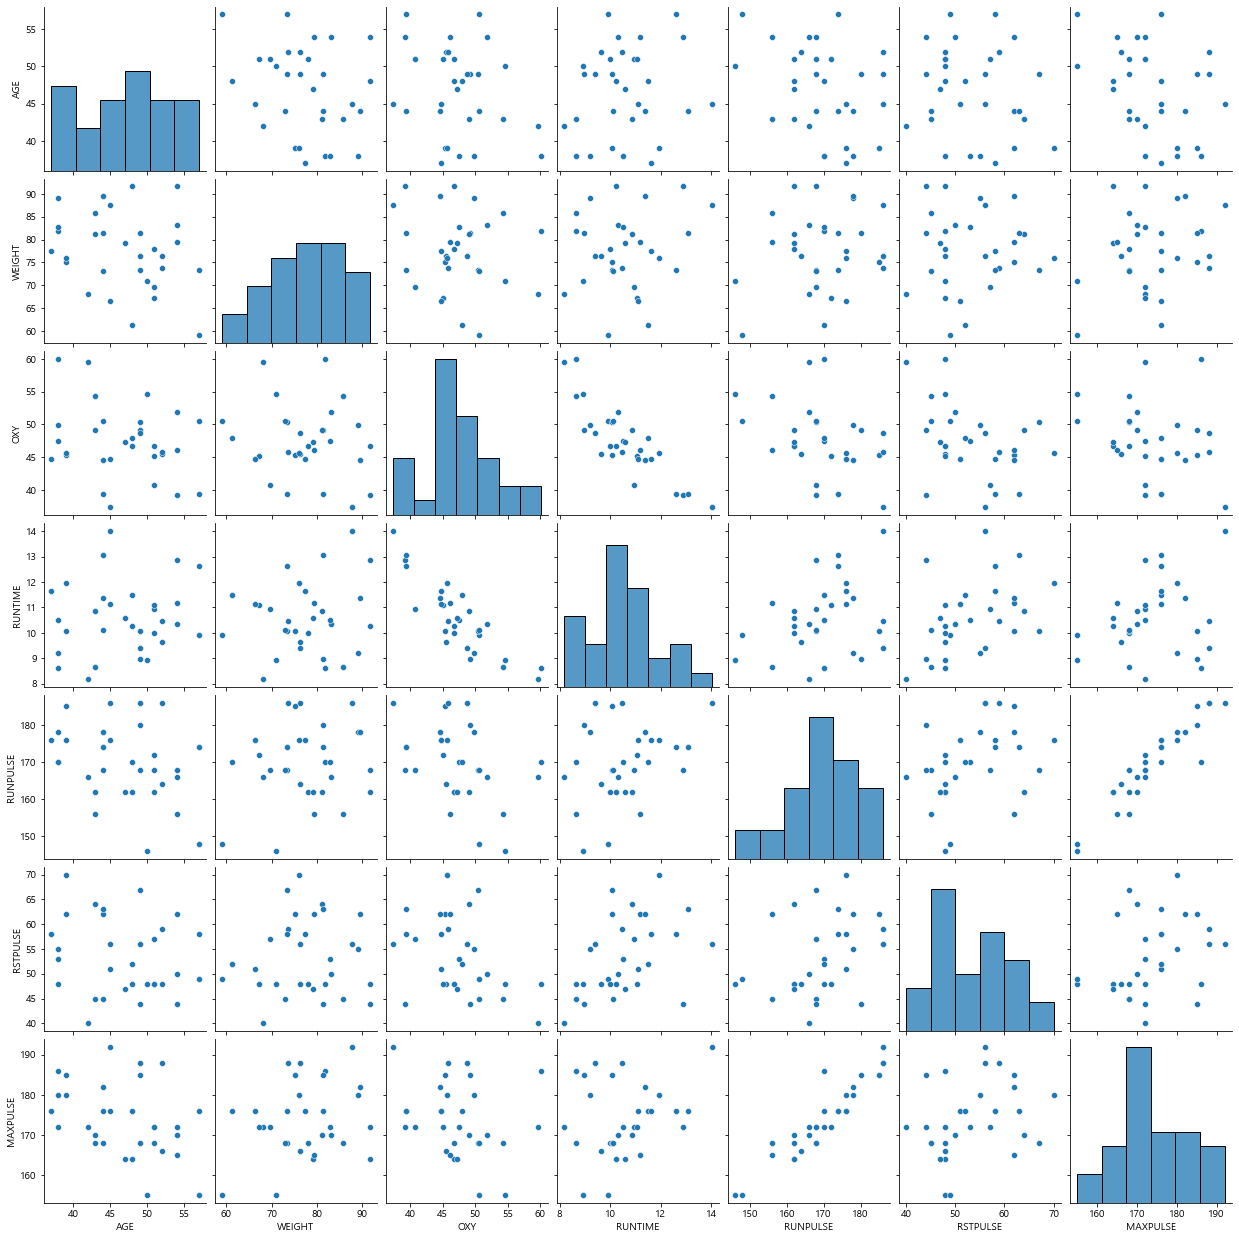

In [25]:
sns.pairplot(df_fitness)

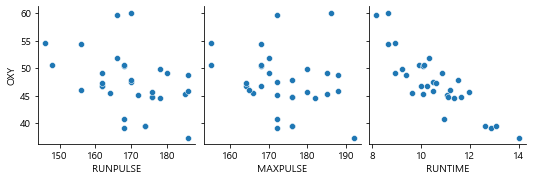

In [26]:
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["RUNPULSE", "MAXPULSE", "RUNTIME"])

# 7. Trend Chart

In [27]:
df_currency = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/환율.csv",
                    encoding = "euc-kr")
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


In [28]:
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY",
                                     values = "STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
20160101,181.48,976.99,1178.0
20160102,181.48,976.99,1178.0
20160103,181.48,976.99,1178.0
20160104,181.10,992.62,1184.0
20160105,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

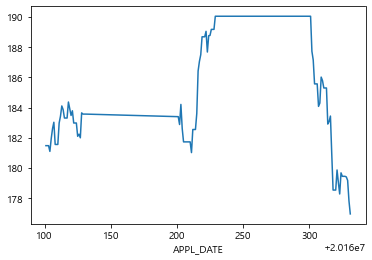

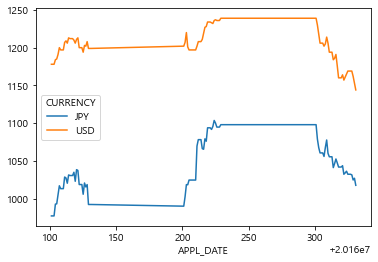

In [29]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY", "USD"]].plot()

# 8. Heatmap

In [32]:
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_agg


,GENDER,AGEGROUP,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,남성,30대,38.000000,81.080000,46.866250,10.355000,177.250000,57.000000,178.250000
1,남성,40대,45.500000,85.465000,44.410000,11.421667,173.666667,56.166667,178.166667
2,남성,50대,54.000000,79.426000,43.476200,11.592000,166.400000,54.200000,171.000000
3,여성,30대,38.500000,78.925000,52.868000,10.290000,173.000000,59.000000,183.000000
4,여성,40대,45.875000,72.943750,50.427125,9.956250,169.000000,50.375000,172.500000
5,여성,50대,52.166667,70.856667,48.031833,10.005000,163.000000,50.000000,167.333333


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

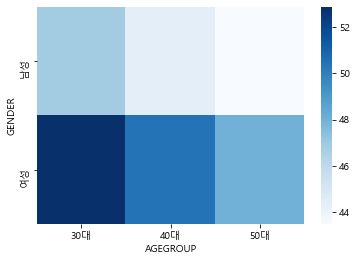

In [33]:
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
sns.heatmap(df_pivot, cmap="Blues")

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

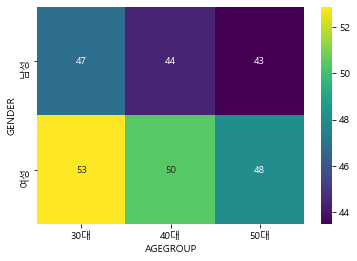

In [34]:
# 위 코드와 같지만 다르게 표현

df_pivot = df_agg.pivot_table(index = "GENDER", columns = "AGEGROUP", values = "OXY", aggfunc = 'mean')
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, annot = True, cmap="viridis")

<AxesSubplot:>

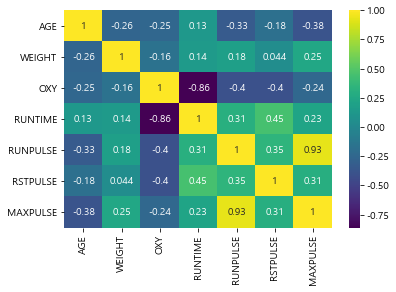

In [35]:
# 상관계수의 heatmap 그리기
# annot = 값 표시

df_cor = df_fitness.corr()
sns.heatmap(df_cor, annot = True, cmap="viridis")

# 9. Contour plot

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

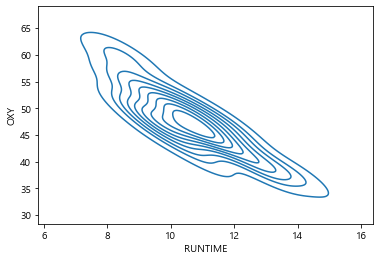

In [36]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

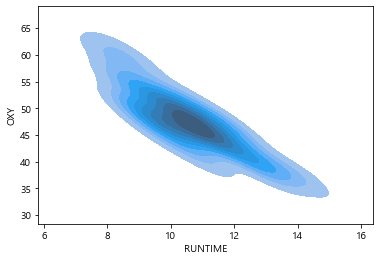

In [37]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = True)

# 10. Parallel Plot

<AxesSubplot:>

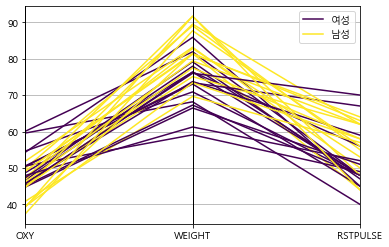

In [39]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols = ["OXY", "WEIGHT", "RSTPULSE"], colormap = "viridis")